 # <span style="color:DarkBlue; font-family: 'Georgia'; font-size: em;">**S09 T01 Practicant amb training i test sets**</span>
 
 _**OBJETIVOS DE LA ACTIVIDAD**_
 

* Aplicar técnicas de preprocesamiento de datos para mejorar el rendimiento de modelos predictivos
* Dividir el Data Set de forma aleatoria para obtener un set de entrenamiento y uno de prueba que permita evaluar la efectividad de un modelo predictivo

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

_**DATOS A UTILIZAR**_

El set de datos a utilizar, <span style=color:DarkBlue>'DelayedFlights.csv'</span> registra el desempeño, a nivel de tiempos de retraso,  de los vuelos nacionales efectuados en EEUU por las 20 aerolineas mas grandes en al año 2008. El DataSet contiene 30 atributos relacionados con los tiempos asociados a cada vuelo, desde fechas y horas de salida y llegada hasta tiempos de retraso asociadas a ciertas causas.

* <span style=color:DarkBlue>Year:</span> Año en que se efectuó el vuelo, 2008
* <span style=color:DarkBlue>'Month','DayofMonth','DayOfWeek':</span> Mes, dia y día de la semana en que se efectuó el vuelo. Estas columnas representadas por numero, 1-12 para Mes, 1-31 Para el día y 1-7 para el día de la semana
* <span style=color:DarkBlue>DepTime:</span> Hora de salida real
* <span style=color:DarkBlue>CRSDepTime:</span> Hora de salida planificada
* <span style=color:DarkBlue>ArrTime:</span> Hora de llegada real
* <span style=color:DarkBlue>CRSArrTime:</span> Hora de llegada planificada
* <span style=color:DarkBlue>UniqueCarrier:</span> Codigo de la aerolinea
* <span style=color:DarkBlue>FlightNum:</span> Numero de vuelo
* <span style=color:DarkBlue>TailNum:</span> Identificador de la aeronave 
* <span style=color:DarkBlue>ActualElapsedTime:</span> Tiempo total del trayecto, en minutos
* <span style=color:DarkBlue>CRSElapsedTime:</span> Tiempo de vuelo estimado, en minutos
* <span style=color:DarkBlue>AirTime:</span> Tiempo de vuelo, en minutos
* <span style=color:DarkBlue>ArrDelay:</span> Retraso en llegada, en minutos
* <span style=color:DarkBlue>DepDelay:</span> Retraso en salida, en minutos
* <span style=color:DarkBlue>Origin:</span> Aeropuerto de origen
* <span style=color:DarkBlue>Dest:</span> Aeropuerto de llegada
* <span style=color:DarkBlue>Distance:</span> Distancia de vuelo, millas
* <span style=color:DarkBlue>TaxiIn:</span> Tiempo con las ruedas en contacto con tierra desde el aterrizaje hasta el desembarco de la nave, en minutos
* <span style=color:DarkBlue>TaxiOut:</span> Tiempo con las ruedas en contacto con tierra desde el la salida de la puerta hasta el despegue, en minutos
* <span style=color:DarkBlue>Cancelled:</span> se canceló el vuelo?
* <span style=color:DarkBlue>CancellationCode:</span> Código de cancelación del vuelo
* <span style=color:DarkBlue>Diverted:</span> Vuelo desviado?
* <span style=color:DarkBlue>CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay  :</span> Causas de retrasos, en minutos



In [2]:
fligth_df = pd.read_csv('Data/DelayedFlights.csv', sep = ',')

In [3]:
fligth_df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [4]:
fligth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [5]:
fligth_df.isnull().sum()

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [6]:
#fligth_df = fligth_df.sample (n = 10000)

<span style="color:DarkBlue; font-family: 'Georgia'; font-size: em;">PRE-PROCESAMIENTO DE DATOS</span>

* Valores nulos y NaN. No tomaremos en cuenta las causas del retraso, 'CarrierDelay','WeatherDelay','NASDelay', 'SecurityDelay', 'LateAircraftDelay', por lo que podremos eliminar estas columnas que contienen una cantidad importante de valores Nulos o NaN 
* Eliminamos algunas columnas que realmente no aportan valor a un posible modelo predictivo como son las columnas de:'FlightNum', 'Unnamed: 0', 'Year' - todos los datos son del 2008, 'Cancelled' - Vemos que todos los valores son 0, al igual que 'Diverted', 'TailNum' podría darnos indicios de alguna aeronave que se retrase mas que otra, pero esto se refleja en el 'DepDelay', así como cualquier retraso asosciado al Origen 'Origin' y Destino 'Dest'
* Eliminaremos las filas restantes donde existan valores nulos, de forma tal de eliminar fuentes de error y mantenernos con un número importante de registros



In [7]:
fligth_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1936758.0,3.341651e+06,2.066065e+06,0.0,1517452.5,3242558.0,4972466.75,7009727.0
Year,1936758.0,2.008000e+03,0.000000e+00,2008.0,2008.0,2008.0,2008.00,2008.0
Month,1936758.0,6.111106e+00,3.482546e+00,1.0,3.0,6.0,9.00,12.0
DayofMonth,1936758.0,1.575347e+01,8.776272e+00,1.0,8.0,16.0,23.00,31.0
DayOfWeek,1936758.0,3.984827e+00,1.995966e+00,1.0,2.0,4.0,6.00,7.0
DepTime,1936758.0,1.518534e+03,4.504853e+02,1.0,1203.0,1545.0,1900.00,2400.0
CRSDepTime,1936758.0,1.467473e+03,4.247668e+02,0.0,1135.0,1510.0,1815.00,2359.0
ArrTime,1929648.0,1.610141e+03,5.481781e+02,1.0,1316.0,1715.0,2030.00,2400.0
CRSArrTime,1936758.0,1.634225e+03,4.646347e+02,0.0,1325.0,1705.0,2014.00,2400.0
FlightNum,1936758.0,2.184263e+03,1.944702e+03,1.0,610.0,1543.0,3422.00,9742.0


In [8]:
fligth_df.drop (['CarrierDelay','WeatherDelay','NASDelay', 'SecurityDelay', 'LateAircraftDelay',
                'FlightNum','Unnamed: 0','Year','Cancelled','Diverted', 'CancellationCode',
                'TailNum','Origin','Dest'], axis = 1, inplace = True)


In [9]:
fligth_df.dropna(inplace = True)

In [10]:
fligth_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928371 entries, 0 to 1936757
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Month              int64  
 1   DayofMonth         int64  
 2   DayOfWeek          int64  
 3   DepTime            float64
 4   CRSDepTime         int64  
 5   ArrTime            float64
 6   CRSArrTime         int64  
 7   UniqueCarrier      object 
 8   ActualElapsedTime  float64
 9   CRSElapsedTime     float64
 10  AirTime            float64
 11  ArrDelay           float64
 12  DepDelay           float64
 13  Distance           int64  
 14  TaxiIn             float64
 15  TaxiOut            float64
dtypes: float64(9), int64(6), object(1)
memory usage: 250.1+ MB


<span style="color:Black; font-family: 'Georgia'; font-size: em;" > **Matriz de correlación** Nos dará una idea de las variables que podrían estar relacionadas con el Target. </span>

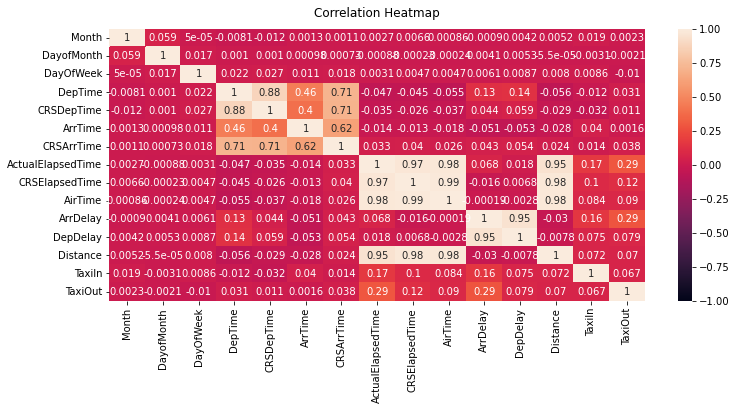

In [11]:
plt.figure(figsize=(12, 5))
heatmap = sns.heatmap(fligth_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

<span style="color:Black; font-family: 'Georgia'; font-size: em;" > **NOTA** </span>

Vemos una importante correlación entre el ArrDelay y el DepDelay

<span style="color:DarkBlue; font-family: 'Georgia'; font-size: em;">EJERCICIO - 1</span>

<span style="color:Black; font-family: 'Georgia'; font-size: em;">Dividir el conjunto de datos en Train & Test y estudiar cada uno por separado</span>

<span style="color:Black; font-family: 'Georgia'; font-size: em;" > La pregunta que intentaremos responder es **¿Cuanto tiempo de retraso tendrá el vuelo?**, por lo marcaremos nuestro atributo 'ArrDelay' como Target, mientras que el resto de atributos los mantendremos, por ahora, como predictores.  </span>


In [12]:
target_column = ['ArrDelay']
predictors = list(set(list(fligth_df.columns))-set(target_column))

In [13]:
X = fligth_df[predictors].values
y = fligth_df[target_column].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [15]:
print ('X Train:\n{} \nX Test:\n{}'.format(X_train.shape,X_test.shape))

X Train:
(1349859, 15) 
X Test:
(578512, 15)


In [16]:
print ('y Train:\n{} \ny Test:\n{}'.format(y_train.shape,y_test.shape))

y Train:
(1349859, 1) 
y Test:
(578512, 1)


<span style="color:DarkBlue; font-family: 'Georgia'; font-size: em;">EJERCICIO - 2</span>

Normalizar los datos, aplicar dummies a variables categóricas y estudiar la posible relación entre los predictores y el Target



<span style="color:Black; font-family: 'Georgia'; font-size: em;" > **'Month', 'DayofMonth' y 'DayOfWeek'** </span>

Son variables numericas que tenemos que pasar a categóricas. </span>

In [17]:
fligth_df = fligth_df.astype({'Month': str,'DayofMonth': str,'DayOfWeek': str })

<span style="color:Black; font-family: 'Georgia'; font-size: em;" > **Dummies**</span>

Sobre las variables categóricas. 

In [18]:
dummies = pd.get_dummies (fligth_df[['Month','DayofMonth','DayOfWeek','UniqueCarrier']])

In [19]:
fligth_df = pd.concat ([fligth_df,dummies], axis = 1)

In [20]:
fligth_df.drop (['Month','DayofMonth','DayOfWeek','UniqueCarrier'], axis = 1, inplace = True)

<span style="color:Black; font-family: 'Georgia'; font-size: em;" > **Normalización de predictores**  </span>


In [21]:
normalizer = Normalizer()

In [22]:
normalizer_array = normalizer.fit_transform(fligth_df[['DepTime', 'CRSDepTime', 
                                                       'ArrTime', 'CRSArrTime','ActualElapsedTime',
                                                      'CRSElapsedTime','AirTime', 'DepDelay', 'Distance',
                                                      'TaxiIn', 'TaxiOut']])

In [23]:
normalizer_df = pd.DataFrame(normalizer_array)

In [24]:
normalizer_df.rename(columns = {0 : 'DepTime_nml', 1 : 'CRSDepTime_nml',  2: 'ArrTime_nml',
                               3 : 'CRSArrTime_nml',4 : 'ActualElapsedTime_nml',5 : 'CRSElapsedTime_nml'
                               ,6 : 'AirTime_nml',7 : 'DepDelay_nml',8 : 'Distance_nml'
                               ,9 : 'TaxiIn_nml',10 : 'TaxiOut_nml'}, inplace = True)

In [25]:
normalizer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1928371 entries, 0 to 1928370
Data columns (total 11 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   DepTime_nml            float64
 1   CRSDepTime_nml         float64
 2   ArrTime_nml            float64
 3   CRSArrTime_nml         float64
 4   ActualElapsedTime_nml  float64
 5   CRSElapsedTime_nml     float64
 6   AirTime_nml            float64
 7   DepDelay_nml           float64
 8   Distance_nml           float64
 9   TaxiIn_nml             float64
 10  TaxiOut_nml            float64
dtypes: float64(11)
memory usage: 161.8 MB


In [26]:
fligth_df.drop (['DepTime', 'CRSDepTime','ArrTime', 'CRSArrTime','ActualElapsedTime',
               'CRSElapsedTime','AirTime', 'DepDelay', 'Distance','TaxiIn', 'TaxiOut'], inplace = True, axis = 1)

In [27]:
final_fligth_df = pd.concat([fligth_df,normalizer_df], axis = 1)

In [28]:
final_fligth_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ArrDelay,1928371.0,42.199885,56.784715,-109.000000,9.000000,24.000000,56.000000,2461.000000
Month_1,1928371.0,0.094855,0.293014,0.000000,0.000000,0.000000,0.000000,1.000000
Month_10,1928371.0,0.053507,0.225042,0.000000,0.000000,0.000000,0.000000,1.000000
Month_11,1928371.0,0.054527,0.227054,0.000000,0.000000,0.000000,0.000000,1.000000
Month_12,1928371.0,0.104496,0.305904,0.000000,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...
AirTime_nml,1928371.0,0.033418,0.019531,0.000000,0.018360,0.028880,0.044127,0.287312
DepDelay_nml,1928371.0,0.013419,0.016997,0.000959,0.003868,0.007633,0.016346,0.759139
Distance_nml,1928371.0,0.233432,0.159670,0.002790,0.109009,0.193481,0.316277,0.940239
TaxiIn_nml,1928371.0,0.002192,0.001820,0.000000,0.001186,0.001715,0.002599,0.075825
